In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from plot import plot_clusters

In [2]:
dataset = pd.read_csv('./data/dataset-3clusters.csv')
x_train = dataset.iloc[:].values

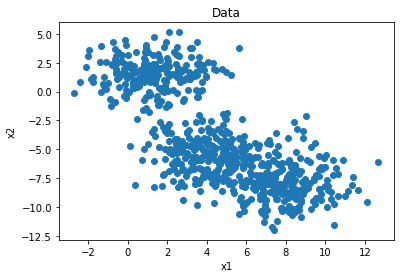

In [3]:
x1, x2 = x_train[:, 0], x_train[:, 1]
plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data')
plt.show()

In [4]:
class KMeans():
    def __init__(self, K):
        if (K <= 0):
            raise ValueError('K has to be greater than zero')
        
        self.K = K
        self.centroids = None  # centroids of the clusters (the index is the cluster number)
        self.centroids_states = None  # array of all intermediate centroids
        self.assignments = None
        self.assignments_prev = None
        self.num_iter = 0
    
    def __str__(self):
        return 'Centroids:\n{}'.format(self.centroids)

    def fit(self, x_train):
        def distance_sq(a, b):
            return np.sum((a - b) ** 2)

        def mean_vec(xs):
            return (1 / len(xs)) * np.sum(xs, axis=0)

        def assign_cluster(x):
            return np.argmin([distance_sq(x, u) for u in self.centroids])

        def new_centroid(k):
            x_indices = np.where(self.assignments == k)[0]  # indices of data pts that are assigned to cluster 'k'
            xs = np.take(x_train, x_indices, axis=0)
            if (len(xs) == 0):
                return x_train[np.random.randint(0, len(x_train))]
            return mean_vec(xs)
        
        centroids_states = []
        
        # K-means Algorithm:
        self.centroids = np.array([ x_train[i] for i in np.random.randint(0, len(x_train), size=self.K) ])  # random init step
        centroids_states.append(self.centroids)
        
        self.assignments = np.array([ assign_cluster(x) for x in x_train ])  # cluster assignment step
        while not np.array_equal(self.assignments, self.assignments_prev):
            self.assignments_prev = self.assignments.copy()
            self.centroids = np.array([ new_centroid(k) for k in np.arange(0, self.K) ])  # move centroid step
            centroids_states.append(self.centroids)
            self.assignments = np.array([ assign_cluster(x) for x in x_train ])  # cluster assignment step
            self.num_iter += 1
        
        self.centroids_states = np.array(centroids_states)
        print('Converged in {} iterations'.format(self.num_iter))

In [9]:
means3 = KMeans(3)
print(means3)

Centroids:
None


In [10]:
means3.fit(x_train)
print(means3)

Converged in 9 iterations
Centroids:
[[ 4.01964619 -5.43346802]
 [ 7.97611905 -7.99100043]
 [ 1.30319097  1.53281507]]


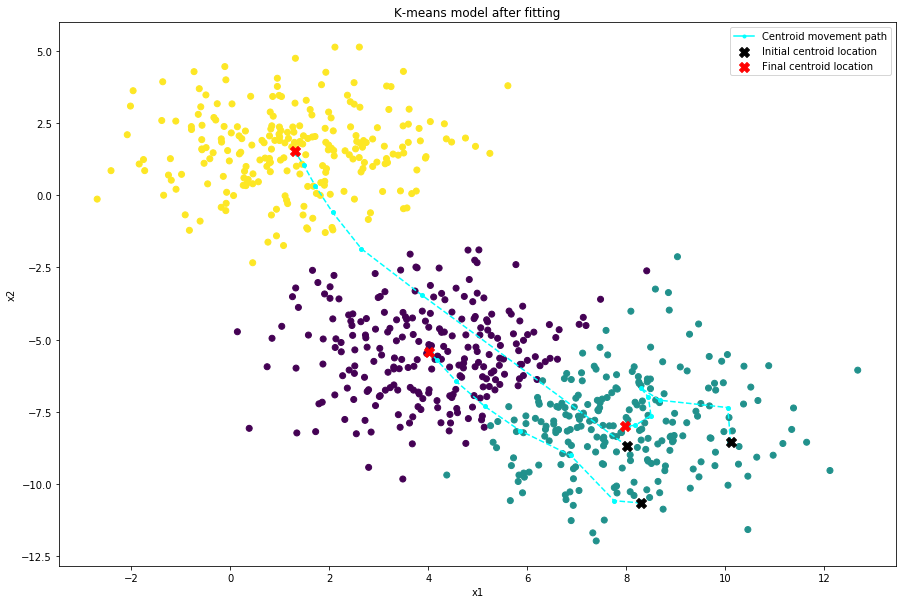

In [15]:
plt.figure(figsize=(15, 10))
plot_clusters(means3, x_train, 'K-means model after fitting')

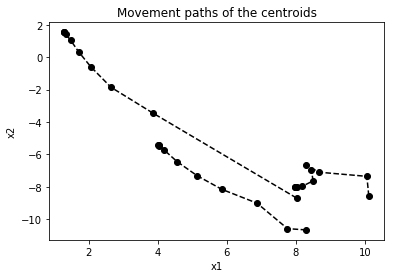

In [16]:
for i in range(means3.K):
    c_states = means3.centroids_states[:, i]  # get all states of centroid i
    plt.plot(c_states[:, 0], c_states[:, 1], c='black', linestyle='dashed', marker='o')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Movement paths of the centroids')
plt.show()